In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

## preprocess pulsar data

In [9]:
pulsars = pd.read_csv('xray_binary_data/pulsars.txt', delim_whitespace=True, header=None, skiprows=3)
pulsars

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,J0002+6216,cwp+17,J0002+6216,cwp+17,00:02:58.17,2,cwp+17,+62:16:09.4,1,cwp+17,*,*,*,*,6.357
1,2,J0006+1834,cnt96,J0006+1834,cnt96,00:06:04.8,2,cn95,+18:34:59,4,cn95,*,*,*,*,0.860
2,3,J0007+7303,aaa+09c,J0007+7303,aaa+09c,00:07:01.7,2,awd+12,+73:03:07.4,8,awd+12,*,*,*,*,1.400
3,4,J0011+08,dsm+16,J0011+08,dsm+16,00:11:34,114,dsm+16,+08:10,8,dsm+16,*,*,*,*,5.399
4,5,B0011+47,dth78,J0014+4746,dth78,00:14:17.75,4,hlk+04,+47:46:33.4,3,hlk+04,*,*,*,*,1.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,2868,J2351+8533,slr+14,J2351+8533,slr+14,23:51:03,1,lsk+18,+85:33:20.6,5,lsk+18,*,*,*,*,2.618
2868,2869,J2352+65,hrk+08,J2352+65,hrk+08,23:52,0,hrk+08,+65,0,hrk+08,*,*,*,*,3.046
2869,2870,J2354-22,mbc+19,J2354-22,mbc+19,23:54:26,0,mbc+19,-22:51:53,0,mbc+19,*,*,*,*,1.108
2870,2871,B2351+61,dbtb82,J2354+6155,dbtb82,23:54:04.7830,1,dgb+19,+61:55:46.845,1,dgb+19,*,*,*,*,2.439


### drop unneeded columns

In [10]:
pulsars.drop([0, 4, 6, 7, 9, 10, 12, 14], axis=1, inplace=True)


In [11]:
pulsars.columns = ['Name', 'ref', 'JName', 'RA', 'DEC', 'Binary Type', 'Companion', 'Dist (Kpc)']

### only include binary pulsars

In [12]:
bin_psrs = pulsars.query('`Binary Type` != "*"')

### extract companion id

In [13]:
bin_psrs['Companion'] = bin_psrs['Companion'].str.split('[').str[0]

/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
bin_psrs

,Name,ref,JName,RA,DEC,Binary Type,Companion,Dist (Kpc)
6,J0023+0923,hrm+11,J0023+0923,00:23:16.878141,+09:23:23.8652,ELL1,UL,1.111
11,B0021-72E,mlr+91,J0024-7204E,00:24:11.10528,-72:05:20.1492,DD,*,4.690
14,B0021-72H,mlr+91,J0024-7204H,00:24:06.7032,-72:04:06.8067,DD,He,4.690
15,B0021-72I,mlr+91,J0024-7204I,00:24:07.9347,-72:04:39.6815,ELL1,UL,4.690
16,B0021-72J,mlr+91,J0024-7204J,00:23:59.4077,-72:03:58.7908,BTX,UL,4.690
...,...,...,...,...,...,...,...,...
2834,B2303+46,dtws85,J2305+4707,23:05:55.842,+47:07:45.32,BT,CO,3.159
2838,J2310-0555,san16,J2310-0555,23:10:06.430,-05:55:35.9,ELL1,He,1.556
2843,J2317+1439,cnt93,J2317+1439,23:17:09.2364,+14:39:31.265,ELL1H,He,2.160
2848,J2322-2650,sbb+18,J2322-2650,23:22:34.64004,-26:50:58.3171,ELL1,UL,0.227


### save binary pulsars for matching

In [84]:
bin_psrs.to_csv('xray_binary_data/bin_pulsars.csv', index=False)

### Read in gaia and bailer-jones matches from the CDS xmatch

In [227]:
bc_gaia_matches = pd.read_csv('xray_binary_data/blackcat_cds_xmatch_edr3.csv')
bc_gaia_distances = pd.read_csv('xray_binary_data/blackcat_cds_xmatch_dist.csv')

psr_gaia_matches = pd.read_csv('xray_binary_data/bin_pulsars_cds_xmatch_edr3.csv')
psr_gaia_distances = pd.read_csv('xray_binary_data/bin_pulsars_cds_xmatch_dist.csv')

### Merge Gaia matches with the Bailer-Jones distances

In [228]:
bc_merged = bc_gaia_matches.merge(bc_gaia_distances.iloc[:,12:], left_on='source_id', right_on='Source')
psr_merged = psr_gaia_matches.merge(psr_gaia_distances.iloc[:,9:], left_on='source_id', right_on='Source')

### For pulsars, only take matches where Dist (kpc) is in the bounds of the photometric distance (rpgeo)

In [229]:
sub_psr_merged = psr_merged[[((psr_merged.loc[ii, 'Dist (Kpc)'] * 1000 < psr_merged.loc[ii, 'B_rpgeo']) & 
           (psr_merged.loc[ii, 'Dist (Kpc)'] * 1000 > psr_merged.loc[ii, 'b_rpgeo'])) for ii in range(len(psr_merged))]]

### Only look at field (i.e. non cluster) pulsars

In [230]:
sub_psr_merged = sub_psr_merged.loc[~sub_psr_merged['Name'].str[-1].str.isalpha()]

### Calculate color and abs mag

In [232]:
bc_merged['BP-RP'] = bc_merged['phot_bp_mean_mag'] - bc_merged['phot_rp_mean_mag']

# M = m - (5 * log10(dist[pc]) - 5)
bc_merged['Gabs'] = bc_merged['phot_g_mean_mag'] - (5 * np.log10(bc_merged['rgeo']) - 5)

sub_psr_merged['BP-RP'] = sub_psr_merged['phot_bp_mean_mag'] - sub_psr_merged['phot_rp_mean_mag']
sub_psr_merged['Gabs'] = sub_psr_merged['phot_g_mean_mag'] - (5 * np.log10(sub_psr_merged['Dist (Kpc)'] * 1000) - 5)

## save matches

In [234]:
sub_psr_merged.to_csv('xray_binary_data/bin_psrs_w_gaia.csv', index=False)
bc_merged.to_csv('xray_binary_data/blackcat_w_gaia.csv', index=False)

## Read in matches (*Start Here)

In [2]:
sub_psr_merged= pd.read_csv('xray_binary_data/bin_psrs_w_gaia.csv')
bc_merged= pd.read_csv('xray_binary_data/blackcat_w_gaia.csv')

## Plot CMD

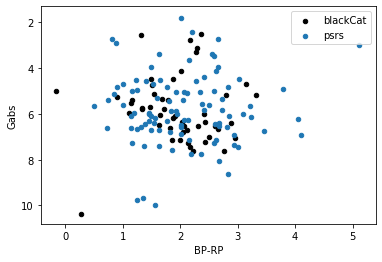

In [3]:
ax = sub_psr_merged.plot.scatter(x='BP-RP', y='Gabs', color='k', label='blackCat')
bc_merged.plot.scatter(x='BP-RP', y='Gabs', ax=ax, label='psrs')

plt.gca().invert_yaxis()

## Get sample of Gaia data to contextualize CMD

In [4]:
df = pd.read_csv('xray_binary_data/edr3_subsample_dist.csv')

In [5]:
df['Gabs'] = df['phot_g_mean_mag'] - (5 * np.log10(df['rgeo']) - 5)

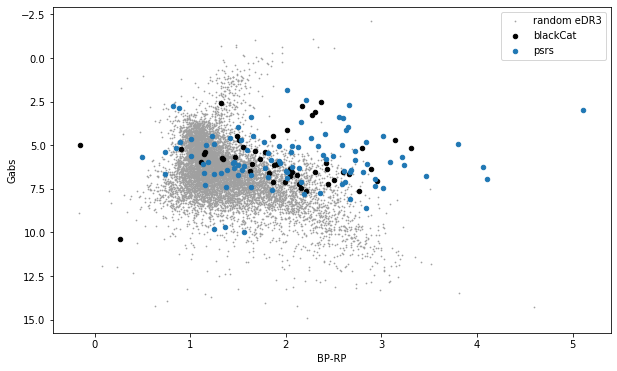

In [6]:
ax=df.sample(n=10000).plot.scatter(x='bp_rp', y='Gabs', s=.5, color='#A0A0A0', label='random eDR3', figsize=(10,6))
sub_psr_merged.plot.scatter(x='BP-RP', y='Gabs', color='k', label='blackCat',ax=ax)
bc_merged.plot.scatter(x='BP-RP', y='Gabs', ax=ax, label='psrs')
plt.gca().invert_yaxis()


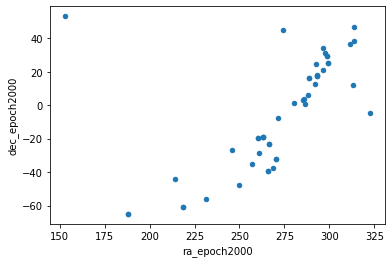

In [7]:
sub_psr_merged.plot.scatter(x='ra_epoch2000', y = 'dec_epoch2000')

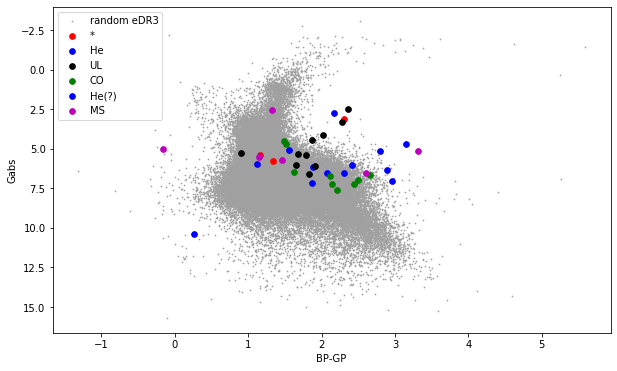

In [8]:
ax=df.sample(n=100000).plot.scatter(x='bp_rp', y='Gabs', s=.5, color='#A0A0A0', label='random eDR3', figsize=(10,6))
colors = ['r', 'b', 'k', 'g', 'b', 'm']
for ii,comp in enumerate(['*', 'He', 'UL', 'CO', 'He(?)', 'MS']):
    sub_psr_merged.query(f'Companion == "{comp}"').plot.scatter(x='BP-GP', y='Gabs', color=colors[ii], label=comp,ax=ax, s=32)
plt.gca().invert_yaxis()
